In [2]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
df = pd.read_csv('age_gender.csv')

In [4]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df.shape

(23705, 5)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  T

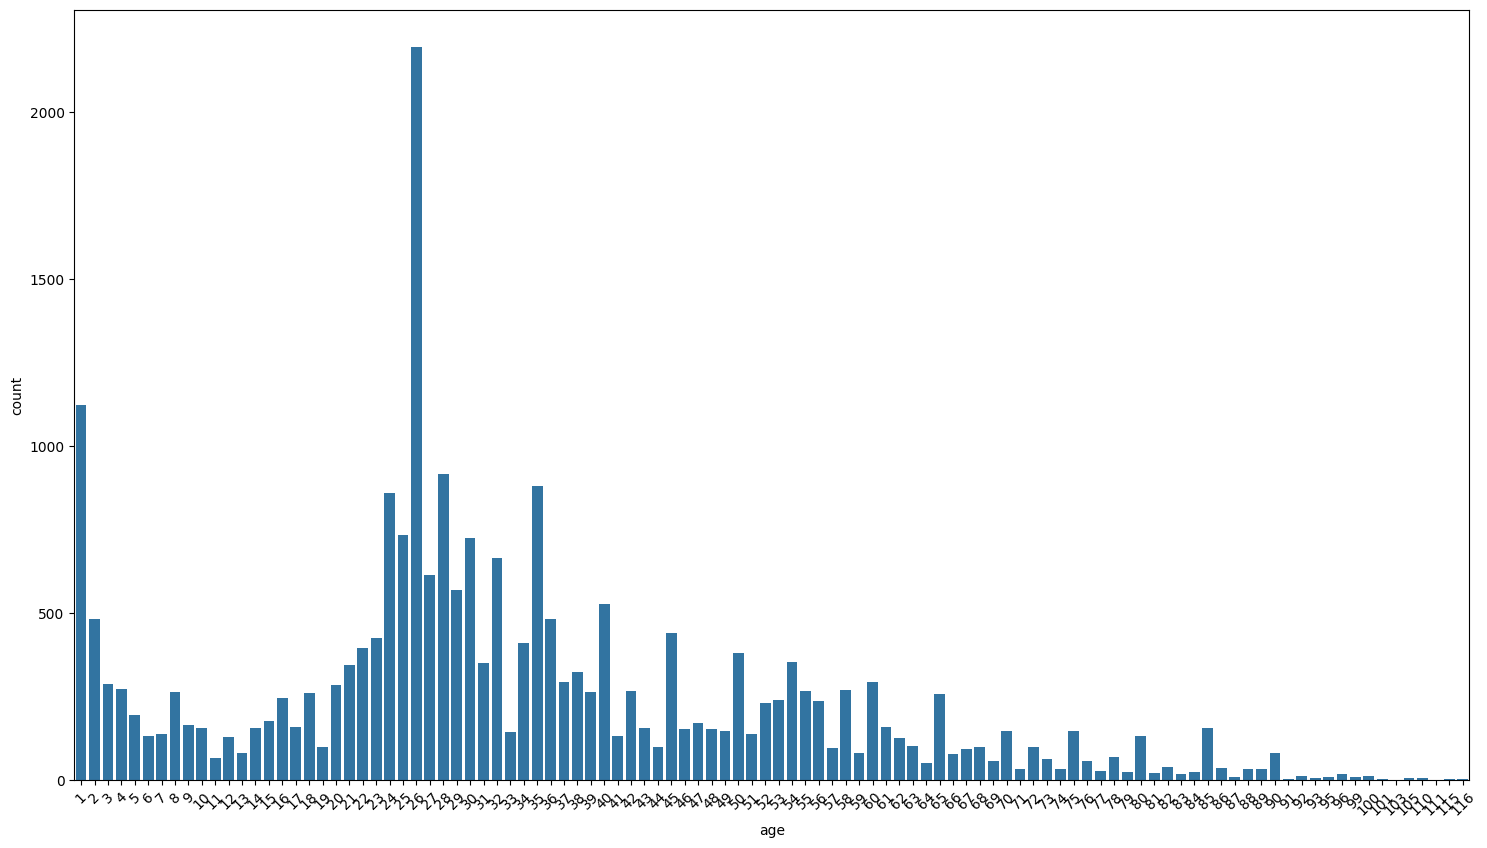

In [6]:
plt.figure(figsize=(18,10))
sns.countplot(data=df, x='age')
plt.xticks(rotation=45)

In [7]:
df['age'].value_counts()

age
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: count, Length: 104, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

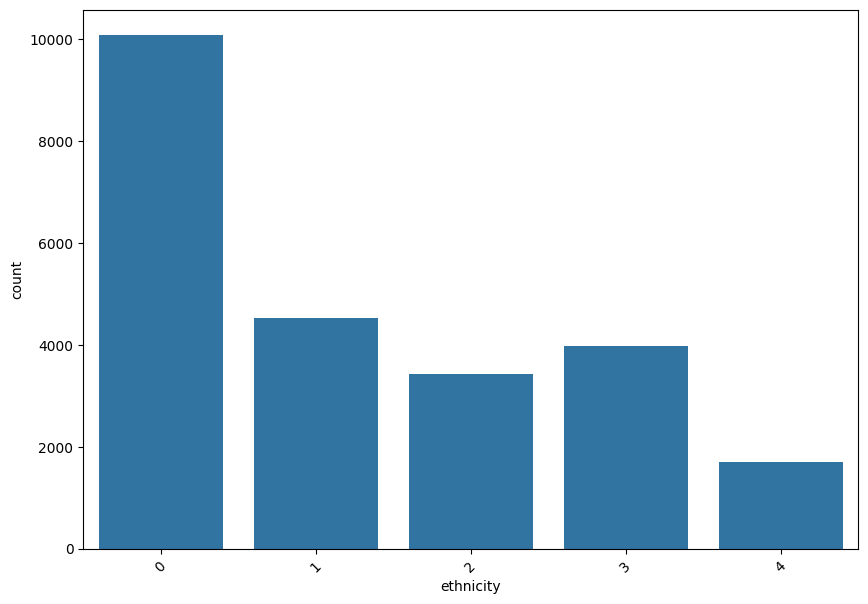

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='ethnicity')
plt.xticks(rotation=45)

In [9]:
df['ethnicity'].value_counts()

ethnicity
0    10078
1     4526
3     3975
2     3434
4     1692
Name: count, dtype: int64

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

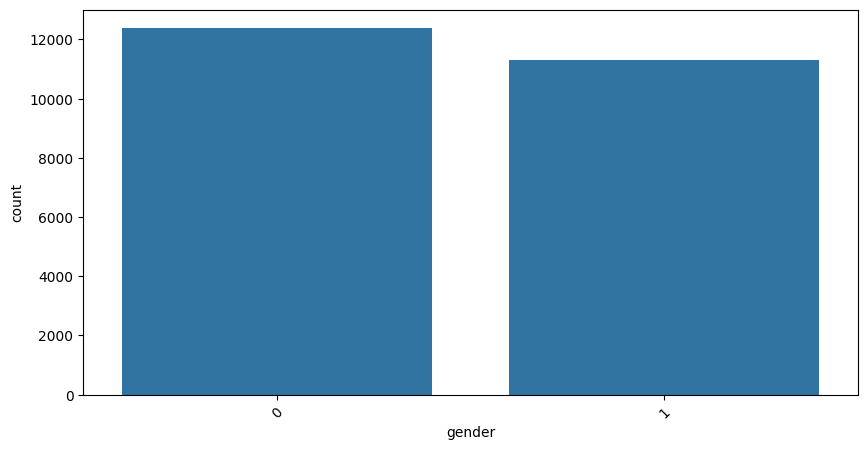

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='gender')
plt.xticks(rotation=45)

In [11]:
df['gender'].value_counts()

gender
0    12391
1    11314
Name: count, dtype: int64

In [12]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [13]:
df['pixels'][0]

array([129., 128., 128., ..., 146., 146., 146.], dtype=float32)

In [14]:
X = np.array(df['pixels'].tolist())

In [15]:
X.shape

(23705, 2304)

In [16]:
X[0] 

array([129., 128., 128., ..., 146., 146., 146.], dtype=float32)

In [17]:
X= X.reshape(-1,48,48,1)

In [18]:
X.shape

(23705, 48, 48, 1)

In [19]:
X[0].shape

(48, 48, 1)

Text(0.5, 0, 'Age:1  Ethnicity:2  Gender:0')

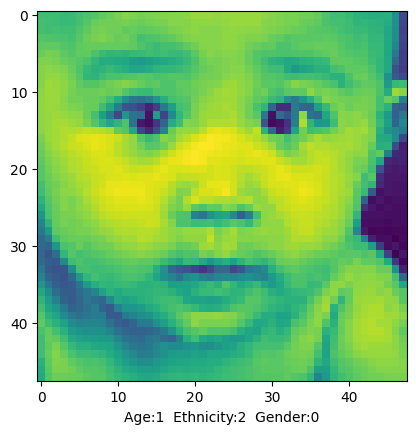

In [20]:
plt.imshow(X[0])
plt.xlabel(
        "Age:"+str(df['age'].iloc[0])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[0])+
        "  Gender:"+ str(df['gender'].iloc[0])
    )

## Age Prediction

In [21]:
df["age"] = pd.cut(df["age"],bins=[0,3,18,45,64,116],labels=["0","1","2","3","4"])

In [22]:
y= to_categorical(np.array(df['age']),num_classes=5)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [24]:
model_age = Sequential()
model_age.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1),kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(MaxPool2D(pool_size=(2,2)))
model_age.add(Flatten())

model_age.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model_age.add(Dropout(0.5))
model_age.add(Dense(5,activation='softmax'))

model_age.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_mean_squared_error', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [26]:
epochs = 200 
batch_size = 64

history_age = model_age.fit(X_train, y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,y_test), steps_per_epoch= X_train.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/200
296/296 [==============================] - 10s 9ms/step - loss: 2.9276 - accuracy: 0.6447 - val_loss: 1.4337 - val_accuracy: 0.7079 - lr: 0.0010
Epoch 2/200
296/296 [==============================] - 2s 8ms/step - loss: 1.1176 - accuracy: 0.7198 - val_loss: 1.5734 - val_accuracy: 0.4805 - lr: 0.0010
Epoch 3/200
296/296 [==============================] - 2s 8ms/step - loss: 0.8821 - accuracy: 0.7465 - val_loss: 1.0356 - val_accuracy: 0.6549 - lr: 0.0010
Epoch 4/200
296/296 [==============================] - 2s 8ms/step - loss: 0.8051 - accuracy: 0.7629 - val_loss: 0.8104 - val_accuracy: 0.7477 - lr: 0.0010
Epoch 5/200
296/296 [==============================] - 2s 8ms/step - loss: 0.7752 - accuracy: 0.7695 - val_loss: 0.8620 - val_accuracy: 0.7174 - lr: 0.0010
Epoch 6/200
296/296 [==============================] - 2s 8ms/step - loss: 0.7544 - accuracy: 0.7757 - val_loss: 0.7806 - val_accuracy: 0.7661 - lr: 0.0010
Epoch 7/200
296/296 [==============================] - 2s 8ms/s

In [27]:
loss, acc = model_age.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.7237024903297424
Test Accuracy: 0.7848555445671082


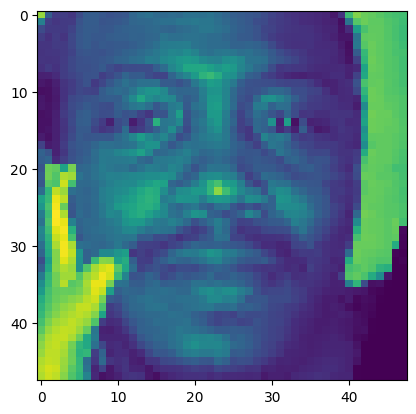

In [28]:
plt.imshow(X_test[1])

In [29]:
input_image = np.expand_dims(X_test[1], axis=0)

predictions = model_age.predict(input_image)
np.argmax(predictions)

1/1 [==============================] - 0s 210ms/step


2

## Gender Classification

In [30]:
y= df['gender']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [31]:
model_gender = Sequential()
model_gender.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1),kernel_regularizer=l2(0.01)))
model_gender.add(BatchNormalization())
model_gender.add(MaxPool2D(pool_size=(2,2)))

model_gender.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_gender.add(BatchNormalization())
model_gender.add(MaxPool2D(pool_size=(2,2)))

model_gender.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_gender.add(MaxPool2D(pool_size=(2,2)))
model_gender.add(Flatten())

model_gender.add(Dense(256,activation='relu'))
model_gender.add(Dropout(0.5))
model_gender.add(Dense(1,activation='sigmoid'))

sgd = tf.keras.optimizers.SGD(momentum=0.9)
model_gender.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [33]:
epochs = 200  
batch_size = 64

history_gender = model_gender.fit(X_train, y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,y_test), steps_per_epoch= X_train.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/200
296/296 [==============================] - 4s 10ms/step - loss: 0.9236 - accuracy: 0.7702 - val_loss: 0.5927 - val_accuracy: 0.8464 - lr: 0.0010
Epoch 2/200
296/296 [==============================] - 3s 9ms/step - loss: 0.4803 - accuracy: 0.8608 - val_loss: 0.4208 - val_accuracy: 0.8633 - lr: 0.0010
Epoch 3/200
296/296 [==============================] - 3s 9ms/step - loss: 0.3777 - accuracy: 0.8764 - val_loss: 0.3777 - val_accuracy: 0.8751 - lr: 0.0010
Epoch 4/200
296/296 [==============================] - 3s 9ms/step - loss: 0.3450 - accuracy: 0.8860 - val_loss: 0.3553 - val_accuracy: 0.8834 - lr: 0.0010
Epoch 5/200
296/296 [==============================] - 3s 8ms/step - loss: 0.3297 - accuracy: 0.8921 - val_loss: 0.3364 - val_accuracy: 0.8853 - lr: 0.0010
Epoch 6/200
296/296 [==============================] - 2s 8ms/step - loss: 0.3175 - accuracy: 0.8965 - val_loss: 0.3733 - val_accuracy: 0.8675 - lr: 0.0010
Epoch 7/200
296/296 [==============================] - 2s 8ms/s

In [34]:
loss, acc = model_gender.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.3294551372528076
Test Accuracy: 0.8932714462280273


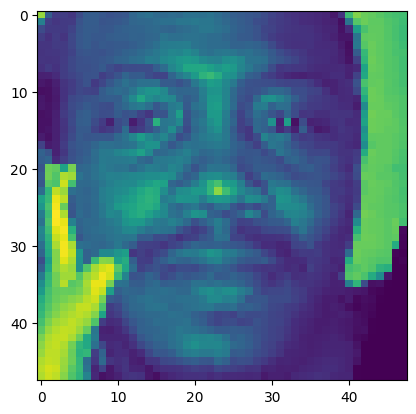

In [35]:
plt.imshow(X_test[1])

In [36]:
input_image = np.expand_dims(X_test[1], axis=0)

predictions = model_gender.predict(input_image)
np.argmax(predictions)

1/1 [==============================] - 0s 91ms/step


0

## Ethinicity Prediction

In [37]:
ethnicity_matrix = np.array(df["ethnicity"])
y = to_categorical(ethnicity_matrix, num_classes = 5)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [39]:
model_ethnicity = Sequential()
model_ethnicity.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1),kernel_regularizer=l2(0.01)))
model_ethnicity.add(BatchNormalization())
model_ethnicity.add(MaxPool2D(pool_size=(2,2)))

model_ethnicity.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_ethnicity.add(BatchNormalization())
model_ethnicity.add(MaxPool2D(pool_size=(2,2)))

model_ethnicity.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_ethnicity.add(MaxPool2D(pool_size=(2,2)))
model_ethnicity.add(Flatten())

model_ethnicity.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model_ethnicity.add(Dropout(0.5))
model_ethnicity.add(Dense(5,activation='softmax'))

model_ethnicity.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [43]:
epochs = 200  
batch_size = 64

history_ethnicity = model_ethnicity.fit(X_train, y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,y_test), steps_per_epoch= X_train.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/200
296/296 [==============================] - 3s 8ms/step - loss: 0.9308 - accuracy: 0.7545 - val_loss: 1.0312 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 2/200
296/296 [==============================] - 2s 8ms/step - loss: 0.9072 - accuracy: 0.7624 - val_loss: 0.8654 - val_accuracy: 0.7728 - lr: 0.0010
Epoch 3/200
296/296 [==============================] - 2s 8ms/step - loss: 0.8868 - accuracy: 0.7682 - val_loss: 0.8464 - val_accuracy: 0.7722 - lr: 0.0010
Epoch 4/200
296/296 [==============================] - 2s 8ms/step - loss: 0.8728 - accuracy: 0.7737 - val_loss: 0.9108 - val_accuracy: 0.7671 - lr: 0.0010
Epoch 5/200
293/296 [============================>.] - ETA: 0s - loss: 0.8689 - accuracy: 0.7780
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
296/296 [==============================] - 2s 8ms/step - loss: 0.8689 - accuracy: 0.7776 - val_loss: 0.8820 - val_accuracy: 0.7663 - lr: 0.0010
Epoch 6/200
296/296 [==============================] - 2s 8

In [44]:
loss, acc = model_ethnicity.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.7561173439025879
Test Accuracy: 0.8010967969894409


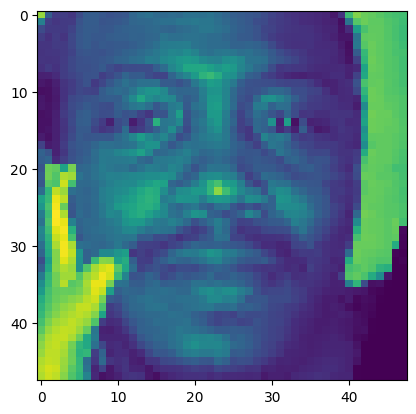

In [45]:
plt.imshow(X_test[1])

In [46]:
input_image = np.expand_dims(X_test[1], axis=0)

predictions = model_ethnicity.predict(input_image)

1/1 [==============================] - 0s 115ms/step


In [47]:
np.argmax(predictions)

1

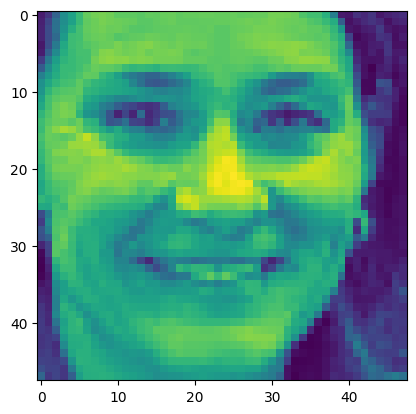

In [48]:
plt.imshow(X_test[20])

In [49]:
input_image = np.expand_dims(X_test[1], axis=0)

predictions = model_ethnicity.predict(input_image)
np.argmax(predictions)

1/1 [==============================] - 0s 41ms/step


1